In [132]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd


import torch
import torch.nn as nn
from torch import autograd
from torch.utils import data
from torch.optim import Adam
from torchvision import datasets, transforms
import torchvision.models as models

In [18]:
!pip show pystan
!pip install pystan==2.19.1.1

Name: pystan
Version: 2.19.1.1
Summary: Python interface to Stan, a package for Bayesian inference
Home-page: https://github.com/stan-dev/pystan
Author: None
Author-email: None
License: GPLv3
Location: /opt/conda/lib/python3.8/site-packages
Requires: Cython, numpy
Required-by: fbprophet


In [19]:
!pip show fbprophet
# !pip install fbprophet==0.7.0

Name: fbprophet
Version: 0.7
Summary: Automatic Forecasting Procedure
Home-page: https://facebook.github.io/prophet/
Author: Sean J. Taylor <sjtz@pm.me>, Ben Letham <bletham@fb.com>
Author-email: sjtz@pm.me
License: MIT
Location: /opt/conda/lib/python3.8/site-packages
Requires: Cython, cmdstanpy, pystan, numpy, pandas, matplotlib, LunarCalendar, convertdate, holidays, setuptools-git, python-dateutil, tqdm
Required-by: 


In [20]:
!pip show plotly
!pip install plotly

Name: plotly
Version: 5.6.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /opt/conda/lib/python3.8/site-packages
Requires: six, tenacity
Required-by: 


In [134]:
# 난수 생성기가 항상 일정한 값을 출력하게 하기 위해 seed 고정
random_seed = 2021
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
np.random.seed(random_seed)

## EDA

In [133]:
DATASET_PATH = os.path.join('data')

In [135]:
train = pd.read_csv(os.path.join(DATASET_PATH, 'train.csv'))
train

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,...,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,...,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,...,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,...,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,...,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,20200517,19,311727,101285,10085,30637,10060,8749,148935,6801,...,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194
3275,20200517,20,305354,91426,8607,26021,8095,7198,136503,6147,...,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962
3276,20200517,21,306008,75113,6325,19933,5711,4494,129412,5134,...,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031
3277,20200517,22,237447,49498,4209,12145,3891,2718,96698,3526,...,2578,8870,16640,11066,4427,11955,1495,7507,5387,8889


In [136]:
train.iloc[:,3:].min(axis=0)

100     0
101     0
120     0
121     0
140     0
150     0
160     0
200     0
201     0
251     0
270     0
300     0
301     0
351     0
352     0
370     0
400     0
450     0
500     1
550     0
600     0
650     0
652     0
1000    0
1020    0
1040    0
1100    0
1200    0
1510    0
2510    0
3000    0
4510    0
5510    0
6000    0
dtype: int64

In [137]:
train.iloc[882:883, 2:]

,10,100,101,120,121,140,150,160,200,201,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
882,0,86,0,1,0,0,4,0,0,0,...,49,0,0,4,0,0,0,35,0,0


In [138]:
train.iloc[:,3:].max(axis=0)


100     200808
101      45869
120     114833
121      24596
140      24639
150     292004
160      14163
200      48349
201      33416
251     165038
270      56939
300      99035
301      53279
351     131904
352     118109
370      19309
400      74691
450     153141
500     215521
550     239389
600      67751
650      58262
652      37465
1000    224895
1020     21409
1040     25891
1100     76629
1200     35192
1510     28531
2510     45531
3000     10581
4510     38061
5510     21229
6000     36915
dtype: int64

In [145]:
train.iloc['100'] == '200808'

TypeError: Cannot index by location index with a non-integer key

In [139]:
train.iloc[882:883, 2:]

,10,100,101,120,121,140,150,160,200,201,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
882,0,86,0,1,0,0,4,0,0,0,...,49,0,0,4,0,0,0,35,0,0


In [123]:
train.iloc[3212:3213, 2:]

,10,100,101,120,121,140,150,160,200,201,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
3212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


([<matplotlib.axis.XTick at 0x7f8804129e50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

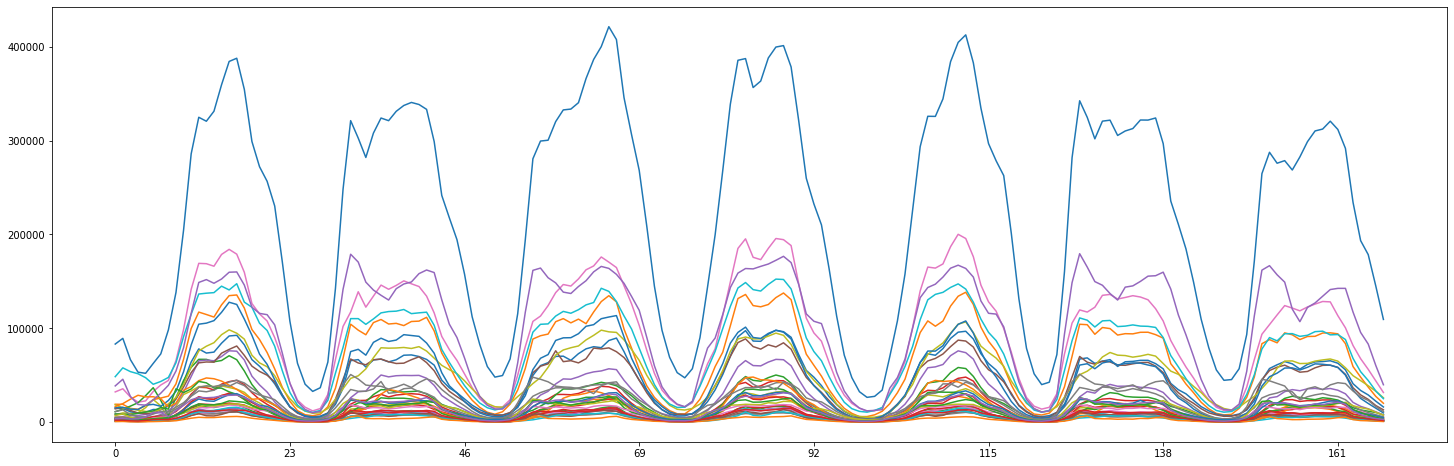

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 8))
plt.plot(train.iloc[:168, 2:])
plt.xticks(range(0,168,23))


([<matplotlib.axis.XTick at 0x7f913ac68b50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

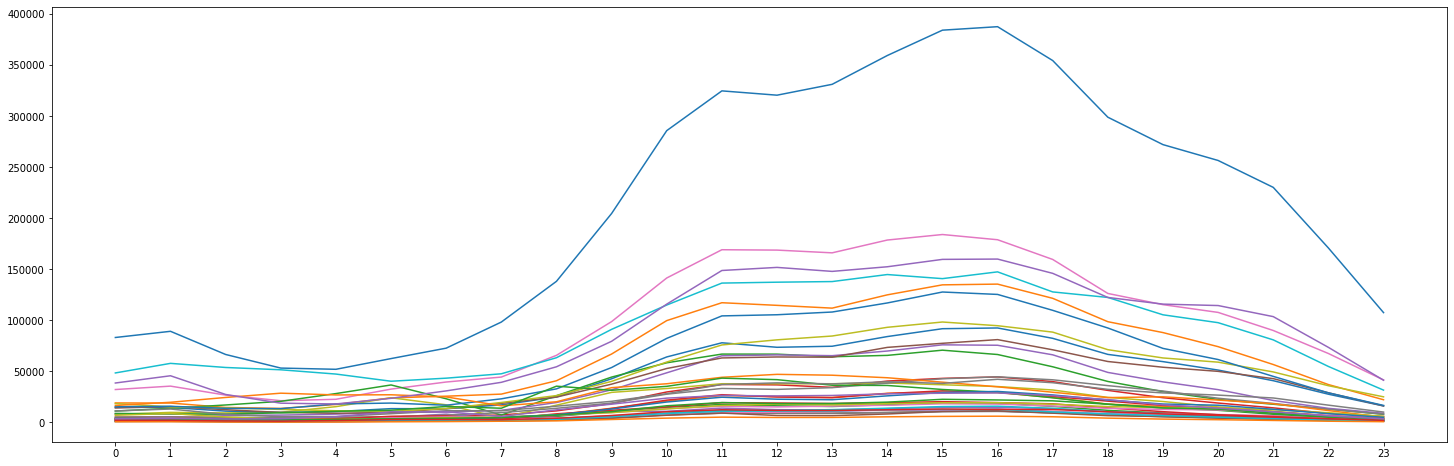

In [25]:
plt.figure(figsize=(25, 8))
plt.plot(train.iloc[:24, 2:])
plt.xticks(range(0,24))

In [26]:
from fbprophet import Prophet

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   날짜      3279 non-null   int64
 1   시간      3279 non-null   int64
 2   10      3279 non-null   int64
 3   100     3279 non-null   int64
 4   101     3279 non-null   int64
 5   120     3279 non-null   int64
 6   121     3279 non-null   int64
 7   140     3279 non-null   int64
 8   150     3279 non-null   int64
 9   160     3279 non-null   int64
 10  200     3279 non-null   int64
 11  201     3279 non-null   int64
 12  251     3279 non-null   int64
 13  270     3279 non-null   int64
 14  300     3279 non-null   int64
 15  301     3279 non-null   int64
 16  351     3279 non-null   int64
 17  352     3279 non-null   int64
 18  370     3279 non-null   int64
 19  400     3279 non-null   int64
 20  450     3279 non-null   int64
 21  500     3279 non-null   int64
 22  550     3279 non-null   int64
 23  600     3279 

In [28]:
train['날짜'] = train['날짜'].astype(str)
train['ds'] = pd.to_datetime(train['날짜']) + pd.to_timedelta(train['시간'], unit='h')
train['ds']

0      2020-01-01 00:00:00
1      2020-01-01 01:00:00
2      2020-01-01 02:00:00
3      2020-01-01 03:00:00
4      2020-01-01 04:00:00
               ...        
3274   2020-05-17 19:00:00
3275   2020-05-17 20:00:00
3276   2020-05-17 21:00:00
3277   2020-05-17 22:00:00
3278   2020-05-17 23:00:00
Name: ds, Length: 3279, dtype: datetime64[ns]

In [29]:
train = train.drop(columns=['날짜', '시간'])

In [30]:
holidays = pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(['2020-01-01', '2020-01-24', '2020-01-25',
                        '2020-01-26', '2020-01-27', '2020-04-15', 
                        '2020-04-30', '2020-05-01', '2020-05-05']),
  'lower_window' : -1,
  'upper_window' : 1
})

In [31]:
holidays

,holiday,ds,lower_window,upper_window
0,holiday,2020-01-01,-1,1
1,holiday,2020-01-24,-1,1
2,holiday,2020-01-25,-1,1
3,holiday,2020-01-26,-1,1
4,holiday,2020-01-27,-1,1
5,holiday,2020-04-15,-1,1
6,holiday,2020-04-30,-1,1
7,holiday,2020-05-01,-1,1
8,holiday,2020-05-05,-1,1


In [43]:
future

,ds
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
3442,2020-05-24 19:00:00
3443,2020-05-24 20:00:00
3444,2020-05-24 21:00:00
3445,2020-05-24 22:00:00


In [32]:
df = pd.DataFrame()
df['ds'] = train['ds']

pred = pd.DataFrame()

for i in range(35):
  df['y'] = train.iloc[:, i]

  m = Prophet(holidays=holidays)  # changepoint_prior_scale=0.1
  # m.add_seasonality(name='monthly', period=30, fourier_order=5)
  m.fit(df)

  future = m.make_future_dataframe(freq='H', periods=168)
  forecast = m.predict(future)
  result = forecast[['ds', 'yhat']]
  
  pred[str(i)] = result['yhat']

pred['ds'] = future
pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -141.231
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7244.52     0.0054152        306.16      0.4418      0.4418      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7256.13     0.0017521       152.222           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       7257.16   8.42475e-05       103.287   5.452e-07       0.001      291  LS failed, Hessian reset 
     299       7259.12   0.000691284       104.384           1           1      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7260.74   0.000548036       70.1181      0.1443      0.6686      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     440       7261.85   0.000105591    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -149.186
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7228.28    0.00117352       189.813      0.6352      0.6352      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       7229.31   0.000201974       176.479   2.117e-06       0.001      268  LS failed, Hessian reset 
     199       7229.43   4.37366e-05       68.9833      0.2619           1      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       7229.45   1.46904e-06       69.3299   1.752e-08       0.001      402  LS failed, Hessian reset 
     240       7229.45   1.78943e-07       54.6565      0.1222           1      408   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.1592
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8223.39    0.00285402       91.0408      0.9845      0.9845      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        8224.1   0.000898807       86.8119           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     280       8224.48    6.0406e-05        95.202    7.46e-07       0.001      389  LS failed, Hessian reset 
     299       8224.48    2.1709e-06       64.8158      0.2837      0.2837      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     350       8224.49   5.56817e-07       79.7193      0.3937           1      476   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -40.657
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8215.44     0.0105574       129.744           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8219.17   0.000346234       104.691      0.3738           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       8219.38   9.24263e-05       113.499   2.316e-07       0.001      312  LS failed, Hessian reset 
     299        8220.3   9.17256e-05       71.5342       1.753      0.1753      425   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       8220.32   7.10208e-05       129.002   8.646e-07       0.001      477  LS failed, Hessian reset 
     338       8220.33   5.71921e-07        63.744      0.1173      0.3784      510   
Optimization terminate

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -129.844
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7006.16   0.000287419       111.753           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       7006.48   0.000155844       143.795   1.382e-06       0.001      218  LS failed, Hessian reset 
     199       7006.62   0.000203343        71.585           1           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7007.25   0.000129619       73.3983           1           1      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       7007.26   4.02773e-05       67.3044   5.756e-07       0.001      477  LS failed, Hessian reset 
     399       7007.31   3.65244e-05       76.0784      0.7474      0.7474      600   
    Iter      log pro

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.2071
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7577.37    0.00118126       85.3206           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7578.43   0.000375252       104.229           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       7578.51   6.12538e-05       92.1799   5.607e-07       0.001      295  LS failed, Hessian reset 
     263       7578.59   1.85757e-05       70.2495    2.67e-07       0.001      421  LS failed, Hessian reset 
     274       7578.59   1.30476e-07       52.4097      0.0448           1      440   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -126.288
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7369.57   0.000690129       119.703           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7372.66    0.00153161        81.282           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       7373.43   0.000328446       177.932   3.203e-06       0.001      326  LS failed, Hessian reset 
     272       7373.61   1.17453e-05       71.3426   1.918e-07       0.001      424  LS failed, Hessian reset 
     295       7373.61   2.05209e-06       72.6807   3.666e-08       0.001      499  LS failed, Hessian reset 
     299       7373.61   2.03099e-06       64.0611      0.3642           1      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -126.095
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7212.54   0.000848869       210.749      0.5577      0.5577      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       7215.62    0.00023279       170.162   2.301e-06       0.001      268  LS failed, Hessian reset 
     199       7215.66   0.000133196       74.6395           1           1      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269       7216.23   0.000119005       114.711   4.841e-07       0.001      419  LS failed, Hessian reset 
     299        7216.7   2.30114e-05       55.7194      0.9849      0.9849      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7216.92   0.000132922        70.083      0.5633      0.5633      573   
    Iter      log pro

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.3652
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       6870.68   0.000133633       128.566    1.23e-06       0.001      153  LS failed, Hessian reset 
      99       6870.87    0.00593905       106.099           1           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       6871.51   0.000140677       135.435    1.17e-06       0.001      227  LS failed, Hessian reset 
     199       6874.59    0.00130349       108.229      0.3076           1      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6875.1   4.53722e-05       72.4235      0.8293      0.8293      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     378       6875.48   6.17909e-05       73.2462   7.724e-07       0.001      597  LS failed, Hessian rese

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -52.0797
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8175.84    0.00140362       410.789      0.3006           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8177.18   6.77379e-05       52.5491           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8177.43     0.0046868       105.378           1           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       8177.58   0.000133851       81.4555   1.829e-06       0.001      451  LS failed, Hessian reset 
     369       8177.61   5.90942e-07        65.198      0.1884           1      515   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -107.56
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7561.75    0.00341845       186.783       4.226      0.4226      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7565.52    0.00208391       210.139      0.1702      0.4818      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       7565.72   0.000181287       219.824   1.038e-06       0.001      299  LS failed, Hessian reset 
     254       7566.36   0.000149285       175.837   1.542e-06       0.001      404  LS failed, Hessian reset 
     299       7566.61    0.00041631       63.8941           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       7566.63   9.10289e-05       91.8931   1.031e-06       0.001      525  LS failed, Hessian reset

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -76.2234
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7553.74    0.00264401       155.217       0.691       0.691      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7558.68    0.00113302       99.3946           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       7559.11    0.00103029       402.439   8.886e-06       0.001      336  LS failed, Hessian reset 
     299       7559.42   1.97735e-05       73.1809       0.308           1      425   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7560.31   6.09939e-06        70.679      0.5369      0.5369      547   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     476       7561.02    0.00034101    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -44.7027
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7543.32    0.00116705       301.644      0.5288           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7545.56     0.0088038       140.601           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7546.06   4.78932e-05       92.1508      0.7579      0.7579      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315       7546.12   0.000170047       215.085   1.572e-06       0.001      433  LS failed, Hessian reset 
     399       7546.16   3.30082e-05        87.555           1           1      536   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     438       7546.17   6.28978e-07    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.2043
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7090.67    0.00220373       100.259           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     192       7091.24   0.000161104       129.856   5.076e-07       0.001      288  LS failed, Hessian reset 
     199       7091.36   0.000600477       86.2342           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       7091.42   4.23931e-07       77.0979           1           1      356   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.1118
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7546.62   0.000374797       72.5043      0.3504           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       7546.99     0.0001028       152.202   7.404e-07       0.001      200  LS failed, Hessian reset 
     199       7547.62   0.000512134       161.163       2.749      0.2749      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     254       7547.91   5.56348e-05       75.4411   7.133e-07       0.001      401  LS failed, Hessian reset 
     299       7547.99   0.000196905       75.9926      0.4177           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     340       7548.05   0.000216045       129.292   2.439e-06       0.001      542  LS failed, Hessian rese

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -159.87
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6747.52   0.000716245       119.196      0.6676      0.6676      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6751.63   0.000126617       66.8597           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274        6751.7   3.08356e-06       67.3893   4.802e-08       0.001      395  LS failed, Hessian reset 
     299       6751.71   8.78398e-05       83.5581      0.4162      0.4162      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     358       6751.78    0.00024122        183.13   3.422e-06       0.001      554  LS failed, Hessian reset 
     399       6751.83   2.85018e-07       69.9485      0.2736      0.2736      601   
    Iter      log prob

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -183.866
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6404.93    0.00157093       133.684      0.8007      0.8007      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6406.89   0.000241995       80.6833           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       6407.76   0.000231434       162.392   9.003e-07       0.001      293  LS failed, Hessian reset 
     299       6408.45   2.88952e-06       84.4542      0.2054           1      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       6408.45   4.56172e-06       101.213   5.352e-08       0.001      461  LS failed, Hessian reset 
     319       6408.45    3.8483e-07       67.4986           1           1      474   
Optimization terminat

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.387
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7048.44    0.00272206       319.919           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       7049.34   0.000371944       132.351   4.749e-06       0.001      222  LS failed, Hessian reset 
     199        7049.5    0.00979041       114.559           1           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       7050.01     0.0001076       87.5356   5.207e-07       0.001      382  LS failed, Hessian reset 
     286       7050.17   3.40101e-06       78.8394   5.285e-08       0.001      481  LS failed, Hessian reset 
     296       7050.17   3.24712e-07        65.645      0.3133           1      494   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -86.6467
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7619.87    0.00548184       249.492       0.851       0.851      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7627.73      0.016044       163.569           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252       7629.25   9.98785e-05       140.664    4.21e-07       0.001      358  LS failed, Hessian reset 
     299       7629.64   0.000786809       127.007           1           1      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     344       7630.37   6.97365e-05       82.6526   3.638e-07       0.001      517  LS failed, Hessian reset 
     399       7630.62   6.09672e-06       77.7579      0.8563      0.8563      584   
    Iter      log pro

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -115.528
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7248.35   0.000821177       85.0124           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       7250.09   9.90676e-05       121.866   7.074e-07       0.001      238  LS failed, Hessian reset 
     199       7250.62   0.000502454        80.628           1           1      273   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       7250.75   0.000106298       132.274   7.229e-07       0.001      320  LS failed, Hessian reset 
     259       7250.87   8.76588e-06       54.1331   1.088e-07       0.001      453  LS failed, Hessian reset 
     268       7250.87   2.51594e-07       47.5588      0.3377           1      469   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.5063
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7430.74    0.00151836       237.004      0.7457      0.7457      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176       7435.97   0.000116449       153.285   5.411e-07       0.001      260  LS failed, Hessian reset 
     199       7436.99    0.00219326       87.0273           1           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       7437.91   0.000895189       266.313   1.154e-05       0.001      382  LS failed, Hessian reset 
     299       7438.26   6.43019e-05       71.9553      0.7806      0.7806      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       7438.44   0.000122255       174.518   8.602e-07       0.001      515  LS failed, Hessian rese

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.1942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6628.44   0.000742514       121.981      0.9657      0.9657      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6629.72    0.00010875       85.5037      0.5404      0.5404      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274       6630.04   0.000268499       193.094   2.874e-06       0.001      380  LS failed, Hessian reset 
     299       6630.12   7.51656e-05       63.2783      0.2591           1      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6630.51    0.00077244       98.6395       0.478       0.478      531   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     415       6630.73   0.000307988    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -59.1701
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        7362.5    0.00214978       93.6603           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       7363.65   0.000117015       152.568   8.521e-07       0.001      268  LS failed, Hessian reset 
     199       7363.97   0.000374097       71.2245           1           1      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     242          7364   6.75202e-07       59.0719      0.9347      0.9347      360   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -46.8704
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7973.83    0.00174906       116.348           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       7974.93   7.92822e-05       141.646   7.335e-07       0.001      196  LS failed, Hessian reset 
     199       7975.75    0.00105436       160.687           1           1      275   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     286       7976.25   5.09905e-05       83.1905    3.28e-07       0.001      431  LS failed, Hessian reset 
     299       7976.35    0.00109172       68.0483      0.7397      0.7397      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7976.48   0.000377332       97.8402           1           1      576   
    Iter      log pro

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -250.227
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6240.58   6.76983e-06       55.4029     0.04723           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       6240.61   9.93839e-06       64.8824   1.608e-07       0.001      233  LS failed, Hessian reset 
     199       6240.63   0.000112714       51.4656      0.7783      0.7783      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       6240.63   2.39523e-05        72.655   3.696e-07       0.001      370  LS failed, Hessian reset 
     299       6240.65   1.39689e-05       74.0891           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     349       6240.76   0.000364635       187.323   4.312e-06       0.001      558  LS failed, Hessian rese

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -107.379
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6722.22    0.00191308       205.056           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6723.24   0.000650326       75.1058           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     284       6723.43   9.11427e-05       84.6499   1.184e-06       0.001      432  LS failed, Hessian reset 
     299       6723.46   0.000320439       81.1234           1           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     383       6723.48   7.84097e-08       72.5948    0.009833           1      563   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -203.253
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6768.91   0.000408223       77.0087       0.857       0.857      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155        6769.5   0.000111291       108.255   8.836e-07       0.001      224  LS failed, Hessian reset 
     199       6769.81   0.000480992       91.2048           1           1      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       6769.82   3.19952e-07       70.2006      0.3421      0.3421      343   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -146.143
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6487.17    0.00327268       157.703           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       6488.52   0.000173519       121.873   2.139e-06       0.001      228  LS failed, Hessian reset 
     192       6489.17   0.000166782       136.052   1.783e-06       0.001      337  LS failed, Hessian reset 
     199       6489.18   0.000124886       63.1375           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     250       6489.32   0.000156508       114.398   1.513e-06       0.001      450  LS failed, Hessian reset 
     299       6489.38   4.96059e-05       71.5546      0.6806      0.6806      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -130.651
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6654.89    0.00702646       245.795      0.4346           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6657.52   0.000685614       104.259           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6658.37   1.29955e-05       76.2416      0.2318      0.2318      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6658.4   0.000334128        71.322           1           1      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     423       6658.44   7.20332e-05       78.2521   8.746e-07       0.001      564  LS failed, Hessian reset 
     494       6658.44   2.21218e-07    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -55.3004
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7137.39    0.00128828       102.261      0.4217           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7138.95   3.96995e-05       74.1369           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       7139.04   0.000203734       63.6404   2.897e-06       0.001      322  LS failed, Hessian reset 
     299       7139.09   1.79829e-05       58.4809           1           1      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     394       7139.23   7.76579e-07       60.8413      0.2203           1      527   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -142.913
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6610.5   0.000611928       88.3198           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150       6611.89    0.00010946       87.4402   9.063e-07       0.001      227  LS failed, Hessian reset 
     198       6612.21   3.99386e-07       78.0795       1.327      0.1327      295   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -96.8446
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6348.29     0.0628526       402.462           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6355.22   0.000804277       112.285      0.1058           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238        6355.9    0.00020422       134.955   2.937e-06       0.001      329  LS failed, Hessian reset 
     296       6356.28   0.000432044       68.3561   9.022e-06       0.001      445  LS failed, Hessian reset 
     299        6356.3   0.000426323       51.1512           1           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     349       6356.42   5.60217e-06       46.0287   1.228e-07       0.001      565  LS failed, Hessian rese

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -148.299
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6650.74    0.00454098        229.66      0.9247      0.9247      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     196        6655.2   0.000121167       87.1939    9.63e-07       0.001      283  LS failed, Hessian reset 
     199       6655.23   0.000224688       87.4196           1           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       6655.31   5.81146e-05       62.5203    1.22e-06       0.001      339  LS failed, Hessian reset 
     241       6655.38   0.000421037       198.996   5.398e-06       0.001      418  LS failed, Hessian reset 
     299       6655.59    0.00579505       210.194           1           1      490   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -204.253
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6290.01   0.000630688       97.2994           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6292.98   0.000371988       75.9715      0.3086           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274        6293.6   0.000210983       148.517   1.881e-06       0.001      359  LS failed, Hessian reset 
     299       6293.69   4.86733e-05       80.8942      0.5101      0.5101      388   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334        6293.7   2.24435e-07       73.9187      0.4785      0.4785      442   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -219.909
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6374.86   0.000436348       85.0946      0.5289      0.5289      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       6375.59   0.000179742       126.832    1.32e-06       0.001      181  LS failed, Hessian reset 
     182       6375.94    2.8612e-05       72.0053    3.43e-07       0.001      328  LS failed, Hessian reset 
     199       6375.94   3.99859e-06       74.3548      0.3698           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       6375.94   4.50111e-06       69.3148   6.597e-08       0.001      398  LS failed, Hessian reset 
     215       6375.94   3.74561e-07       74.2917           1           1      412   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,ds
0,62013.454194,16386.858835,3010.248930,6759.202228,2351.487184,1527.280755,26650.795713,1729.977720,7377.919395,2244.684861,...,2043.670039,4535.609400,3839.874009,2398.383201,3778.591911,1134.449991,2235.959027,495.514169,2853.702137,2020-01-01 00:00:00
1,28662.276736,9686.259268,2476.219772,5518.112787,1824.131429,1232.791898,13840.669711,1297.732977,6479.710494,1781.202295,...,745.657404,706.278819,1424.677680,1969.000343,2530.888316,1006.646452,1403.855849,-218.382999,1730.879149,2020-01-01 01:00:00
2,8790.682685,5601.963701,2125.334877,5004.071642,1159.192067,951.354611,8179.173913,984.345647,5965.472093,1747.924018,...,-217.736013,-2286.237811,-415.570354,1887.547705,1687.951691,718.164440,145.993666,-981.606899,662.758604,2020-01-01 02:00:00
3,13275.964126,7546.756086,2225.142011,5493.901319,891.047414,887.129847,12582.009099,999.791551,6170.628654,2092.117675,...,-68.155608,-1712.938241,-376.697282,2092.788730,1706.358540,521.987185,-294.420363,-1084.631723,766.208345,2020-01-01 03:00:00
4,46881.815611,17394.553160,2944.397207,7043.707003,1603.962115,1241.472315,27062.084694,1514.216806,7198.892436,2628.149891,...,1852.782783,4244.780427,2417.033732,2425.646321,3022.722104,754.081303,1529.840952,102.116390,2956.670810,2020-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,299635.442981,89677.888301,9546.628765,25755.929192,9234.381542,7252.817496,132423.509733,6049.480998,18816.382734,8242.721536,...,14572.659089,36561.349850,17246.430798,7847.223831,21732.990512,3520.230395,15824.857522,10533.143409,18599.953998,2020-05-24 19:00:00
3443,257709.895048,70035.475073,7023.370439,20080.539341,6597.114514,5415.391287,112557.982062,4745.269540,14632.944011,6618.581014,...,12097.043971,29623.971999,14748.030136,6551.155146,17291.772158,2455.355178,11448.700186,7727.482415,13413.611375,2020-05-24 20:00:00
3444,216877.575060,53455.330651,5156.063893,15847.338077,4426.812668,3940.338769,94612.279702,3636.759770,11318.721138,5319.710426,...,9486.610521,22515.585368,11841.576944,5530.290442,13524.782008,1492.476779,7308.491050,5385.723595,9126.351235,2020-05-24 21:00:00
3445,179331.784112,41866.806771,4029.774374,13021.703920,3140.698948,3040.506027,78061.700247,2847.855382,9131.888084,4296.437305,...,7323.027214,17200.923611,9250.294110,4674.200500,10818.467040,928.264195,4698.569206,4019.816716,6592.687221,2020-05-24 22:00:00


In [33]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'holiday', 'holiday_lower',
       'holiday_upper', 'holidays', 'holidays_lower', 'holidays_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

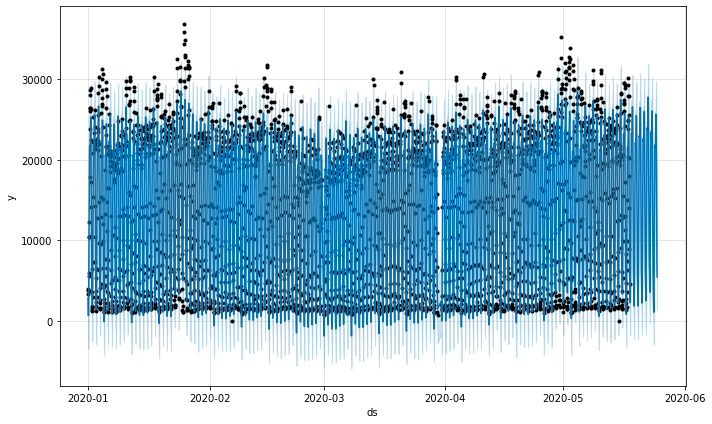

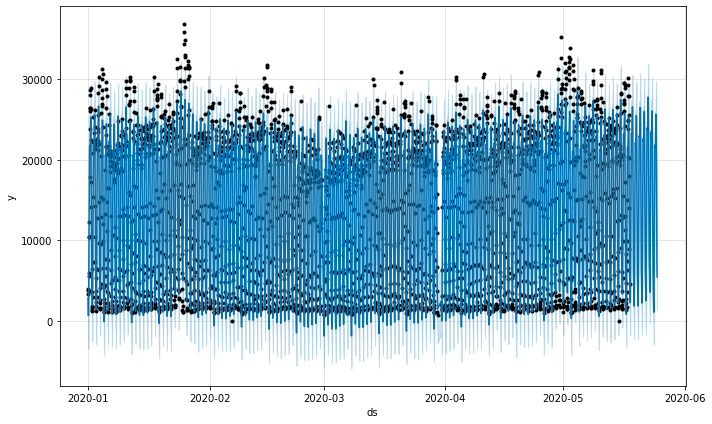

In [34]:
m.plot(forecast)

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


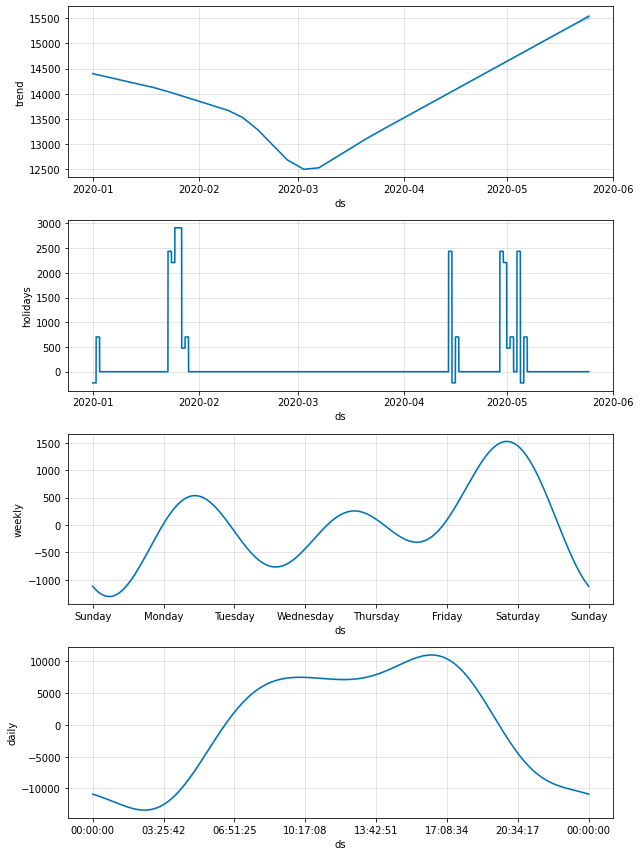

In [15]:
fig2 = m.plot_components(forecast)

In [52]:
pd.read_csv(os.path.join(DATASET_PATH, 'validate.csv'))

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200511,0,77968,14429,1233,4021,981,881,28672,1064,...,637,2604,5239,4168,1155,3596,337,2262,1608,2337
1,20200511,1,48679,9136,823,2618,654,572,17722,672,...,353,1870,3359,2558,1002,2157,257,1425,1018,1810
2,20200511,2,33773,8199,578,2188,392,502,14464,579,...,345,1499,2646,2022,876,1959,232,1155,927,1530
3,20200511,3,41511,9986,726,2817,555,646,17793,650,...,390,1730,3398,1967,912,2462,281,1477,959,1882
4,20200511,4,78680,19509,1463,4720,825,1088,35125,997,...,679,2958,7369,4120,1569,4568,577,3155,1871,3656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20200524,19,314226,98345,10625,28618,8316,6684,141675,6619,...,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014
332,20200524,20,300001,87871,8226,22706,6981,5743,142933,6295,...,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787
333,20200524,21,304150,71126,6002,18317,4939,3779,133110,4781,...,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041
334,20200524,22,236751,44947,3575,11455,3135,2536,98582,3267,...,2489,8093,14427,10914,3861,11397,859,7270,5194,8230


In [53]:
pd.read_csv(os.path.join(DATASET_PATH, 'test.csv'))

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200518,0,82065,15172,1500,3294,1086,962,28931,1103,...,618,2790,5147,4331,1329,3665,404,2242,1619,2314
1,20200518,1,51248,9840,813,2356,696,546,17888,720,...,430,1864,3269,2561,921,2081,272,1390,1003,1766
2,20200518,2,39026,7894,760,2413,408,549,13357,498,...,322,1313,2765,1931,920,1764,228,1136,922,1309
3,20200518,3,40993,10137,780,2701,420,741,15544,532,...,326,1766,3320,2060,892,2447,337,1495,975,1912
4,20200518,4,77863,19603,1276,5019,968,1160,32101,968,...,669,2914,6986,3911,1368,4380,513,2940,1758,3629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20200531,19,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
332,20200531,20,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
333,20200531,21,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
334,20200531,22,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


## Dataloader
* 한 칼럼에 대한 7일(168행) 데이터를 input_data, 뒤따르는 7일 데이터를 output_data로 반환합니다.
* 도로별 차이를 두지 않고 모든 도로를 동일한 타입의 데이터로 취급합니다.
* 모든 csv 파일의 마지막 168행은 예측해야하는 값이므로 input으로 들어가지 않습니다.

In [31]:
class CustomDataset(data.Dataset):      # torch.utils.data.Dataset 클래스의 상속 클래스 CustomDataset class 생성. 상속 클래스 생성시 __init__, __getitem__, __len__함수는 기본적으로 정의해줘야 함.
    
    def __init__(self, root, seq_len, batch_size=64, phase='train'):      # 데이터 로드 단계에 사용될 여러 변수들을 'self.변수명'의 형태로 지정해두는 함수
        
        self.root = root      # CustomDataset 객체 생성 시 데이터 경로 앞부분(공통 부분)을 root로 입력받아 저장
        self.phase = phase      # CustomDataset 객체 생성 시 데이터 경로 뒷부분(train/validate/test)을 phase로 입력받아 저장
        self.label_path = os.path.join(self.root, self.phase + '.csv')      # 데이터 전체 경로 생성
        df = pd.read_csv(self.label_path)      # 생성한 데이터 전체 경로로부터 데이터 로드
        
        self.seq_len = seq_len * 24      # 일 단위 기간을 입력 받은 후 시간 단위 기간으로 변환하여 저장
        self.batch_size = batch_size
        self.labels = {}
        
        timestamps = [(i, j) for (i, j) in zip(list(df['날짜']), list(df['시간']))]      # 날짜와 시간 정보가 튜플로 들어 있는 리스트 생성
        categories = df.columns.values.tolist()[2:]      # 도로명 column list 생성

        input_data = []
        output_data = []

        for t in range(len(timestamps)):
            temp_input_data = []
            temp_output_data = []
            for col in categories:
                road = df[col].tolist()
                inp = [float(i) for i in road[t:t+self.seq_len]]      # input 데이터 시계열 구간 설정
                outp = [float(j) for j in road[t+self.seq_len:t+2*self.seq_len]]      # output 데이터 시계열 구간 설정
                temp_input_data.append(inp) 
                temp_output_data.append(outp)
            input_data.append(temp_input_data)
            output_data.append(temp_output_data)
            
# input_data : [[첫번째 input 기간 동안의 첫번째 도로의 통행량 list, ..., 첫번째 input 기간 동안의 35번째 도로의 통행량 list], ...,
#               [마지막 input 기간 동안의 첫번째 도로의 통행량 list, ..., 마지막 input 기간 동안의 35번째 도로의 통행량 list]]
# output_data : [[첫번째 output 기간 동안의 첫번째 도로의 통행량 list, ..., 첫번째 output 기간 동안의 35번째 도로의 통행량 list], ...,
#                [마지막 output 기간 동안의 첫번째 도로의 통행량 list, ..., 마지막 output 기간 동안의 35번째 도로의 통행량 list]]
        
        self.labels['timestamp'] = timestamps
        self.labels['category'] = categories
        self.labels['input'] = input_data
        self.labels['output'] = output_data

    def __getitem__(self, index):      # index를 가지고 데이터를 하나씩 불러올 수 있게 하는 함수

#         데이터 내 index가 부여되는 형태

#                 | road_1    road_2    ...  road_35
#                -------------------------------------
#         time_1  | index_0   index_1   ...  index_34
#         time_2  | index_35  index_36  ...  index_69

        row = index // 35      # index를 35(도로수)로 나눈 몫  ex) 71//35 -> 2
        col = index % 35      # index를 35(도로수)로 나눈 나머지  ex) 71%35 -> 1

        timestamp = self.labels['timestamp'][row]      # (날짜, 시간) 튜플이 들어있는 list에서 row번째 시점에 해당하는 튜플
        category = self.labels['category'][col]      # 도로명 column list에서 col번째 도로에 해당하는 element
        
        input_data = torch.tensor(self.labels['input'][row][col])      # input_data list에서, row번째 시점의 col번째 도로 교통량 정보

        if self.phase != 'test':
            output_data = torch.tensor(self.labels['output'][row][col])
        else:
            output_data = []

        return timestamp, category, (input_data, output_data)

    def __len__(self):      # getitem 함수를 통해 데이터를 불러오려면,전체 index 길이를 알아야 한다.
        return (len(self.labels['timestamp']) - (self.seq_len * 2) + 1) * 35      # 특정 시점이 아닌 특정 기간을 하나의 data 단위로 설정하면, 전체 샘플 수는 감소함을 반영 


def data_loader(root, phase='train', batch_size=64, seq_len=7, drop_last=False):
    if phase == 'train':
        shuffle = True
    else:
        shuffle = False

    dataset = CustomDataset(root, seq_len, batch_size, phase)
    dataloader = data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last)

    return dataloader

## Model

In [34]:
# 가능하면 gpu 사용
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class LSTMNet(nn.Module):
    def __init__(self,
                 input_size=168,      # input 길이는 168시간(7일 X 24시간)
                 hidden_size=1024,
                 output_size=168,      # output 길이는 168시간(7일 X 24시간)
                 batch_size=64,
                 num_layers=3,
                 dropout=0,
                 batch_first=False):      # batch_first(default=False) : 배치 차원을 첫번째 차원으로 하여 데이터를 불러올 것인지 여부

        super(LSTMNet, self).__init__()

        self.hidden_size = hidden_size
        
        ##### Layer 1
        self.lstm1 = nn.LSTM(input_size,
                             hidden_size,
                             dropout=0.2,
                             num_layers=num_layers)

        ##### Layer 2
        self.lstm2 = nn.LSTM(hidden_size, 
                             hidden_size,
                             dropout=0.2,
                             num_layers=num_layers)

        ##### Finalize
        self.linear = nn.Linear(hidden_size, 
                                output_size)
        
        self.activation = nn.LeakyReLU(0.2)

        
    def forward(self, x, h_in, c_in):

        h_in = nn.Parameter(h_in.type(dtype), requires_grad=True)      # gradient descent로 업데이트 되는(requires_grad=True), h_in 이라는 이름의 파라미터 생성 
        c_in = nn.Parameter(c_in.type(dtype), requires_grad=True)      # gradient descent로 업데이트 되는(requires_grad=True), c_in 이라는 이름의 파라미터 생성

        # Layer 1
        lstm_out, (h_1, c_1) = self.lstm1(x, (h_in, c_in))
        lstm_out = self.activation(lstm_out)

        # Layer2
        lstm_out, (h_2, c_2) = self.lstm2(lstm_out, (h_1, c_1))
        lstm_out = self.activation(lstm_out)

        # Final
        predictions = self.linear(lstm_out)
        
        return predictions, (h_2, c_2)

In [12]:
# 결과 파일과 모델 가중치 파일 저장을 위해 log 디렉토리 생성. 중요한 파일이 덮어씌워지지 않도록 주의
os.makedirs('log', exist_ok=True)


def save_model(model_name, model, optimizer):
    state = {
        'model': model.state_dict(),
        'optimizer': optimizer.state_dict()
    }
    torch.save(state, os.path.join('log', model_name + '.pth'))
    print('model saved\n')
    return os.path.join('log', model_name + '.pth')


def load_model(model_name, model, optimizer=None):
    state = torch.load(os.path.join(model_name))
    model.load_state_dict(state['model'])
    if optimizer is not None:
        optimizer.load_state_dict(state['optimizer'])
    print('model loaded')

## Hyperparameters

In [13]:
dtype = torch.float
model_name = 'sequential'

batch_size = 64
num_epochs = 5
val_epoch = 1
base_lr = 0.01
seq_len = 7

input_size = seq_len * 24
output_size = input_size
hidden_size = 1024
num_layers = 6

## Training Setting

In [14]:
# model
model = LSTMNet(input_size=input_size,
                hidden_size=hidden_size,
                output_size=output_size,
                batch_size=batch_size,
                num_layers=num_layers)
model = model.to(device)

# loss function
criterion = nn.MSELoss()

# optimizer
optimizer = Adam(model.parameters(), lr=base_lr)      # optimizer로는 Adam이 가장 무난합니다. Adam을 쓰면 learning_rate를 따로 지정해주지 않아도 알아서 조정됩니다.

In [15]:
print(model)

LSTMNet(
  (lstm1): LSTM(168, 1024, num_layers=6, dropout=0.2)
  (lstm2): LSTM(1024, 1024, num_layers=6, dropout=0.2)
  (linear): Linear(in_features=1024, out_features=168, bias=True)
  (activation): LeakyReLU(negative_slope=0.2)
)


In [16]:
# get data loader
train_dataloader = data_loader(root=DATASET_PATH,
                               phase='train',
                               batch_size=batch_size,
                               seq_len=seq_len,
                               drop_last=True)

validate_dataloader = data_loader(root=DATASET_PATH,
                                  phase='validate',
                                  batch_size=1,
                                  seq_len=seq_len,
                                  drop_last=True)

## Train

In [17]:
train_batch_loss = 0.0
train_epoch_loss = 0.0

valid_epoch_loss = 0.0
valid_min_epoch_loss = np.inf

for epoch in range(num_epochs):

    model.train()      # 모델을 train mode로 전환. train mode일 때만 적용되어야 하는 drop out 등이 적용될 수 있게 하기 위함 

    for iter_, sample in enumerate(train_dataloader):      # enumerate 함수를 통해 train_dataloader에서 'batch의 index'와 'batch'를 순서대로 호출

        (h_in, c_in) = (torch.zeros(num_layers, batch_size, hidden_size, requires_grad=True).to(device),
                        torch.zeros(num_layers, batch_size, hidden_size, requires_grad=True).to(device))

        _, _, (input_data, output_data) = sample      # train_dataloader에서 불러온 sample은 [[날짜, 시간], [도로], [[input_data],[output_data]]]로 구성됨. 학습에는 [[input_data], [output_data]]만 사용
        
        input_data = input_data.unsqueeze(0).to(device)
        output_data = output_data.unsqueeze(0).to(device)

        pred, (h_in, c_in) = model(input_data, h_in, c_in)
        
        loss = criterion(pred, output_data)

        model.zero_grad()    # 파라미터 업데이트는 batch 단위로 이루어지고, 매 batch마다 gradient를 초기화해주어야 함 
        loss.backward()      # backpropagation
        optimizer.step()      # 파라미터 업데이트
        
        train_batch_loss += loss.item()
        train_epoch_loss += loss.item()

        if iter_ % 400 == 399:      # 400개의 batch마다 training Loss 출력
            print('Train Epoch: {:2} | Batch: {:4} | Loss: {:1.2f}'.format(epoch, iter_+1, train_batch_loss/400))
            train_batch_loss = 0
            
    train_epoch_loss = 0.0

    
    model.eval()      # 모델을 eval mode로 전환. eval mode에서 적용되면 안되는 drop out 등이 적용되지 않게 하기 위함

    with torch.no_grad():      # validation / test set에 대해서는 weight 및 bias의 update, 즉, gradient descent가 일어나지 않도록 no_grad()를 선언
        (h_in, c_in) = (torch.zeros(num_layers, 1, hidden_size, requires_grad=False).to(device),
                        torch.zeros(num_layers, 1, hidden_size, requires_grad=False).to(device))

        for iter_, sample in enumerate(validate_dataloader):      # enumerate 함수를 통해 validate_dataloader에서 'batch의 index'와 'batch'를 순서대로 호출

            _, _, (input_data, output_data) = sample      # validate_dataloader에서 불러온 sample은 [[날짜, 시간], [도로], [[input_data],[output_data]]]로 구성됨. validation에는 [[input_data], [output_data]]만 사용

            input_data = input_data.unsqueeze(0).to(device)
            output_data = output_data.unsqueeze(0).to(device)

            pred, (h_in, c_in) = model(input_data, h_in, c_in)
            loss = criterion(pred, output_data)
            valid_epoch_loss += loss.item()

        print('\nValid Epoch: {:2} | Loss: {:1.2f}'.format(epoch, valid_epoch_loss/len(validate_dataloader)))

        if valid_epoch_loss < valid_min_epoch_loss:
            save_model('best', model, optimizer)
            valid_min_epoch_loss = valid_epoch_loss

        valid_epoch_loss = 0.0

Train Epoch:  0 | Batch:  400 | Loss: 3752691240.64
Train Epoch:  0 | Batch:  800 | Loss: 3643884846.56
Train Epoch:  0 | Batch: 1200 | Loss: 3571245715.20
Train Epoch:  0 | Batch: 1600 | Loss: 3470419334.88

Valid Epoch:  0 | Loss: 3663979553.20
model saved

Train Epoch:  1 | Batch:  400 | Loss: 3373998799.20
Train Epoch:  1 | Batch:  800 | Loss: 3470541481.28
Train Epoch:  1 | Batch: 1200 | Loss: 3426023007.52
Train Epoch:  1 | Batch: 1600 | Loss: 3379567339.84

Valid Epoch:  1 | Loss: 3437512433.26
model saved

Train Epoch:  2 | Batch:  400 | Loss: 3464754154.88
Train Epoch:  2 | Batch:  800 | Loss: 3199432218.16
Train Epoch:  2 | Batch: 1200 | Loss: 3162610875.52
Train Epoch:  2 | Batch: 1600 | Loss: 3084228992.00

Valid Epoch:  2 | Loss: 3260869322.17
model saved

Train Epoch:  3 | Batch:  400 | Loss: 3207627090.24
Train Epoch:  3 | Batch:  800 | Loss: 3044467711.84
Train Epoch:  3 | Batch: 1200 | Loss: 2998197906.00
Train Epoch:  3 | Batch: 1600 | Loss: 3112904882.88

Valid Epoch

## Inference

In [18]:
dtype = torch.float
seq_len = 7

input_size = seq_len * 24
hidden_size = 1024
output_size = input_size
batch_size = 1
num_layers = 6

In [19]:
test_dataloader = data_loader(root=DATASET_PATH,
                              phase='test',
                              batch_size=batch_size,
                              seq_len=seq_len,
                              drop_last=True)

In [20]:
model = LSTMNet(input_size=input_size,
                hidden_size=hidden_size,
                output_size=output_size,
                batch_size=batch_size,
                num_layers=num_layers)

# model
model_name = 'log/best.pth'

load_model(model_name, model)
model = model.to(device)

model loaded


In [21]:
submission_file_path = os.path.join(DATASET_PATH, 'sample_submission.csv')
submission_table = pd.read_csv(submission_file_path)

In [22]:
(h_in, c_in) = (torch.zeros(num_layers, 1, hidden_size, requires_grad=False).to(device),
                torch.zeros(num_layers, 1, hidden_size, requires_grad=False).to(device))

for iter_, sample in enumerate(test_dataloader):

    timestamp, category, (input_data, output_data) = sample
    input_data = input_data.unsqueeze(0).to(device)

    pred, (h_in, c_in) = model(input_data, h_in, c_in)

    for i, (t, h) in enumerate(zip(timestamp[0], timestamp[1])):
        for cat, row in zip(category, pred[0]):
            cat = f'{cat}'
            submission_table[cat] = row.tolist()

In [23]:
submission_table.to_csv('prediction.csv', index=False)